In [307]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

For more on knn: https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-3-classification-decision-trees-and-k-nearest-neighbors-8613c6b6d2cd

In [42]:
iris = pd.read_csv('data/Iris.csv')

In [43]:
iris.shape

(150, 6)

In [44]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [46]:
iris['Species'] = iris['Species'].astype('category')

In [49]:
iris['species'] = iris.Species.cat.codes

In [50]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [62]:
iris.loc[:,['Species','species']].drop_duplicates()

,Species,species
0,Iris-setosa,0
50,Iris-versicolor,1
100,Iris-virginica,2


In [63]:
iris['Species'] = iris.Species.cat.codes

In [64]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,0,0
1,2,4.9,3.0,1.4,0.2,0,0
2,3,4.7,3.2,1.3,0.2,0,0
3,4,4.6,3.1,1.5,0.2,0,0
4,5,5.0,3.6,1.4,0.2,0,0


In [72]:
x,y = iris.drop(['Id','species','Species'],axis=1).values, iris.Species.values

In [73]:
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2)

In [74]:
x_trn.shape

(120, 4)

![knn_algo](../imgs/knn.jpg)

**Only difference for knn regression is we take the mean of the target in the final step**

## knn scratch

In [298]:
class knnBase():
    def __init__(self, k):
        self.k = k
        self.scalar = StandardScaler()

    def fit(self, trn_x, trn_y):
        self.x = self.scalar.fit_transform(trn_x)
        self.y = trn_y

    def euclidean_dist(self, tst_instance):
        return np.sqrt(np.sum(np.square(self.x - tst_instance), axis=1))

    def get_neighbours_idx(self, distance):
        return np.argsort(distance, axis=0)[:self.k]

In [299]:
class knnClassifier(knnBase):
    def __init__(self, k):
        super().__init__(k)

    def predict(self, tst_x):
        num_obs = tst_x.shape[0]
        tst_x_norm = self.scalar.transform(tst_x)
        pred = []
        for i in range(num_obs):
            tst_instance = tst_x_norm[i, :]
            distance = self.euclidean_dist(tst_instance)
            idxs = self.get_neighbours_idx(distance)
            y_nn = self.y[idxs]
            cls = list(set(self.y))
            class_cnt = [0] * len(cls)
            for i, e in enumerate(cls):
                class_cnt[i] = np.sum(y_nn == e)
            pred.append(cls[np.argmax(class_cnt)])
        return pred

In [300]:
class knnRegressor(knnBase):
    def __init__(self, k):
        super().__init__(k)

    def predict(self, tst_x):
        num_obs = tst_x.shape[0]
        tst_x_norm = self.scalar.transform(tst_x)
        pred = []
        for i in range(num_obs):
            tst_instance = tst_x_norm[i, :]
            distance = self.euclidean_dist(tst_instance)
            idxs = self.get_neighbours_idx(distance)
            y_nn = self.y[idxs]
            pred.append(np.mean(y_nn))
        return pred

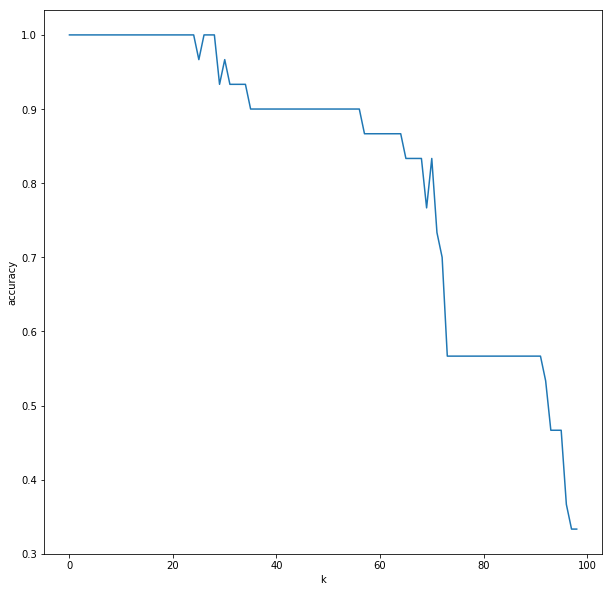

In [306]:
accuracy_tracker = []
for k in range(1, 100):
    clf = knnClassifier(k)
    clf.fit(x_trn, y_trn)
    accuracy_tracker.append(accuracy_score(y_tst, clf.predict(x_tst)))
plt.figure(figsize=(10, 10))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(accuracy_tracker)

Notes:
* Scaling of features are required for KNN
* If a dataset has many variables, it is difficult to find the right weights and to determine which features are not important for classification/regression
* Interpretability. There are exceptions: if the number of neighbors is large, the interpretability deteriorates
* In Kaggle competitions, k-NN is often used for the construction of meta-features (i.e. k-NN predictions as input to other models) or for stacking/blending
* We can do weighted KNN based on distance or user defined function
* We can find probabilites around class prediction based on ratio of class among the neighbors